# Single label classification with fastai

This notebook shows how to perform simple classification using the fastai library

In [1]:
from fastai.vision.all import *

In [2]:
# Get data from one of the available datasets
path = untar_data(URLs.PETS)

In [3]:
files = get_image_files(path/"images")
len(files)

7390

### Classifying cats vs. dogs

First, we just try distinguishing cats from dogs. As specified in the library documentation, the name of the file begins with a capital for cats, and a lowercased letter for dogs

In [ ]:
files[0], files[6]

In [ ]:
def label_func(f): return f[0].isupper()

To get our data ready for a model, we need to put it in a DataLoaders object. Here we have a function that labels using the file names, so we will use `ImageDataLoaders.from_name_func`

In [ ]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

We have passed to this function the directory we're working in, the `files` we grabbed, our `label_func` and one last piece as `item_tfms`: this is a `Transform` applied on all items of our dataset that will resize each image to 224 by 224, by using a random crop on the largest dimension to make it a square, then resizing to 224 by 224. If we didn't pass this, we would get an error later as it would be impossible to batch the items together

In [ ]:
dls.show_batch() #True is cat, False is dog

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1) # one epoch

In [ ]:
learn.show_results()

### Classifying breeds

Now we trying something more complex, that is trying to classify the breed of the cat or dog.
In the dataset, the breed is specified by the text **before** the last `_`

In [4]:
files[0].name

'basset_hound_7.jpg'

In [5]:
pat = r'^(.*)_\d+.jpg'

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

In [ ]:
dls.show_batch()

Classifying a breed is harder, so we use another DataLoader which uses augmentation of the data:

In [6]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

This time we resize the images to a bigger dimension, and we added `batch_tfms`. 
`aug_transform` performs a collection of different data augmentation transforms, that could be customized  via the appropriate arguments

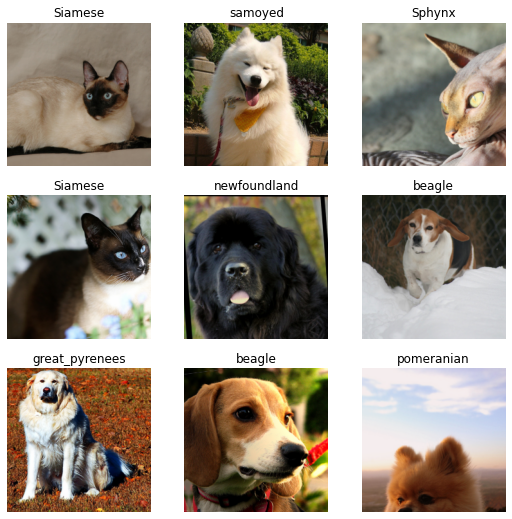

In [7]:
dls.show_batch()

In [8]:
torch.cuda.empty_cache()
learn = cnn_learner(dls, resnet50, metrics=error_rate)

Now we use the learning rate finder to choose the best possible learning rate

In [9]:
torch.cuda.empty_cache()
learn.lr_find()

RuntimeError: CUDA out of memory. Tried to allocate 98.00 MiB (GPU 0; 3.94 GiB total capacity; 2.95 GiB already allocated; 89.44 MiB free; 3.04 GiB reserved in total by PyTorch)

In [ ]:
print(learn)